In [74]:
import pandas as pd
data = pd.read_csv("train.csv")


# Data Exploration

## Data Fields
* datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather -
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals (Dependent Variable)

In [75]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [76]:
data.shape

(10886, 12)

In [77]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [78]:
import calendar
from datetime import datetime
data[["date","time"]] = data["datetime"].str.split(" ", expand=True)
data["time"] = data["time"].str.split(":",expand=True)[0] 
data["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data["month"] = data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, "%Y-%m-%d").month])
data["season"] = data.season.map({1 : "Spring", 2 : "Summer", 3 : "Fall", 4: "Winter"})
data["weather"] = data.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                    2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ",\
                                    3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",\
                                    4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04,Saturday,January
5,2011-01-01 05:00:00,Spring,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",9.84,12.880,75,6.0032,0,1,1,2011-01-01,05,Saturday,January
6,2011-01-01 06:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,2,0,2,2011-01-01,06,Saturday,January
7,2011-01-01 07:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,8.20,12.880,86,0.0000,1,2,3,2011-01-01,07,Saturday,January
8,2011-01-01 08:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,1,7,8,2011-01-01,08,Saturday,January
9,2011-01-01 09:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,13.12,17.425,76,0.0000,8,6,14,2011-01-01,09,Saturday,January


In [79]:
data = data.drop(["datetime"],axis=1)

In [80]:
data["time"] = data["time"].astype("category")
data["weekday"] = data["weekday"].astype("category")
data["month"] = data["month"].astype("category")
data["season"] = data["season"].astype("category")
data["weather"] = data["weather"].astype("category")
data["holiday"] = data["holiday"].astype("category")
data["workingday"] = data["workingday"].astype("category")
data.dtypes



season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
time          category
weekday       category
month         category
dtype: object

In [81]:
import numpy as np 
dp = data.dtypes
dataTypeDf = pd.DataFrame(data.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})

In [82]:
data.dtypes.value_counts()

int64       4
float64     3
category    2
object      1
category    1
category    1
category    1
category    1
category    1
dtype: int64

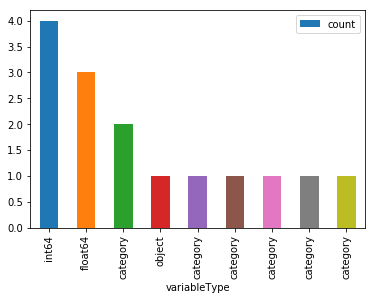

In [83]:
dataTypeDf.plot(x ='variableType', y='count', kind = 'bar')	


# Testing Missing Value

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

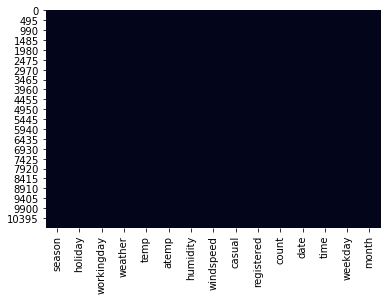

In [85]:
sns.heatmap(data.isnull(), cbar=False)

### No Missing value found in the dataset

# Testing for Skewness

In [86]:
data.skew(axis=0)

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

In [87]:
data.info

<bound method DataFrame.info of        season holiday workingday  \
0      Spring       0          0   
1      Spring       0          0   
2      Spring       0          0   
3      Spring       0          0   
4      Spring       0          0   
5      Spring       0          0   
6      Spring       0          0   
7      Spring       0          0   
8      Spring       0          0   
9      Spring       0          0   
10     Spring       0          0   
11     Spring       0          0   
12     Spring       0          0   
13     Spring       0          0   
14     Spring       0          0   
15     Spring       0          0   
16     Spring       0          0   
17     Spring       0          0   
18     Spring       0          0   
19     Spring       0          0   
20     Spring       0          0   
21     Spring       0          0   
22     Spring       0          0   
23     Spring       0          0   
24     Spring       0          0   
25     Spring       0          0

In [88]:
temp_feature = data["temp"]
holiday_feature = data["holiday"]

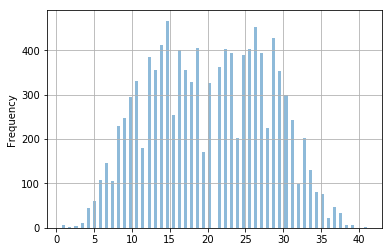

In [89]:
#import matplotlib.pyplot as plt
temp_feature.to_frame().plot.hist(alpha=0.5, bins=100, grid=True, legend=None)

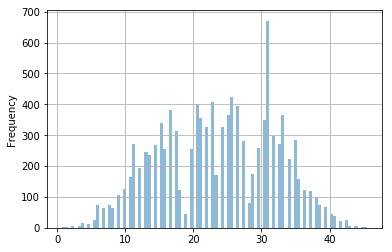

In [90]:
atemp_feature = data["atemp"]
atemp_feature.to_frame().plot.hist(alpha=0.5, bins=100, grid=True, legend=None)

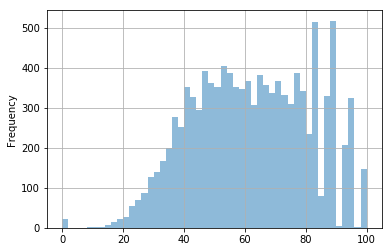

In [91]:
data["humidity"].to_frame().plot.hist(alpha=0.5, bins=50, grid=True, legend=None)

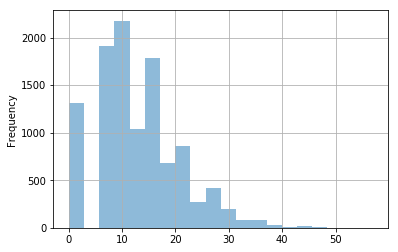

In [92]:
data["windspeed"].to_frame().plot.hist(alpha=0.5, bins=20, grid=True, legend=None)

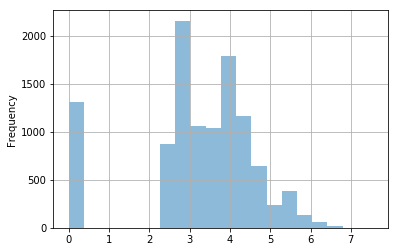

In [93]:
data["windspeed"].apply(np.sqrt).to_frame().plot.hist(alpha=0.5, bins=20, grid=True, legend=None)

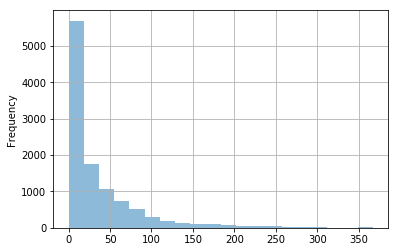

In [94]:
data["casual"].to_frame().plot.hist(alpha=0.5, bins=20, grid=True, legend=None)

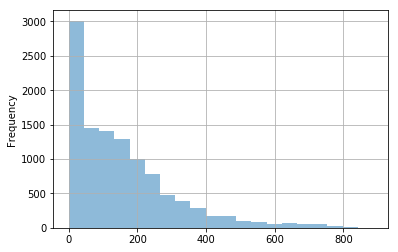

In [95]:
data["registered"].to_frame().plot.hist(alpha=0.5, bins=20, grid=True, legend=None)

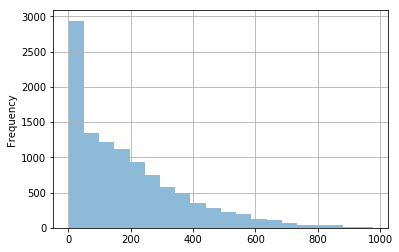

In [96]:
data["count"].to_frame().plot.hist(alpha=0.5, bins=20, grid=True, legend=None)

In [97]:
data.time

0        00
1        01
2        02
3        03
4        04
5        05
6        06
7        07
8        08
9        09
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       20
21       21
22       22
23       23
24       00
25       01
26       02
27       03
28       04
29       06
         ..
10856    18
10857    19
10858    20
10859    21
10860    22
10861    23
10862    00
10863    01
10864    02
10865    03
10866    04
10867    05
10868    06
10869    07
10870    08
10871    09
10872    10
10873    11
10874    12
10875    13
10876    14
10877    15
10878    16
10879    17
10880    18
10881    19
10882    20
10883    21
10884    22
10885    23
Name: time, Length: 10886, dtype: category
Categories (24, object): [00, 01, 02, 03, ..., 20, 21, 22, 23]

# Outlier Analysis

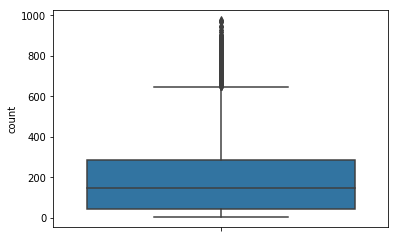

In [98]:
sns.boxplot(data=data, y="count")

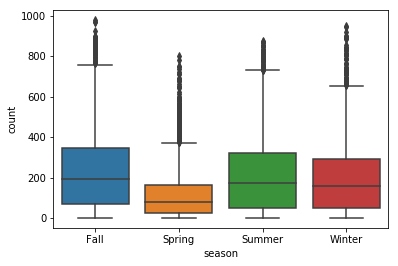

In [99]:
sns.boxplot(data=data, y="count", x="season")

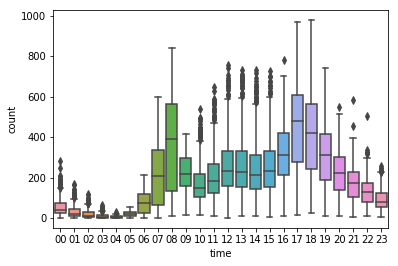

In [100]:
sns.boxplot(data=data, y="count", x="time")

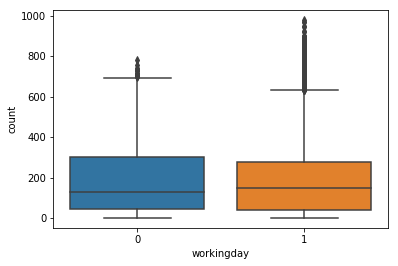

In [101]:
sns.boxplot(data = data, y = "count", x = "workingday")

In [102]:
cleaned_data = data[np.abs(data["count"] - data["count"].mean()) <= (3 * data["count"].std())]

In [103]:
data.shape

(10886, 15)

In [104]:
cleaned_data.shape

(10739, 15)

# Finding Dependent Variables 

In [105]:
corr_matrix = data.corr()

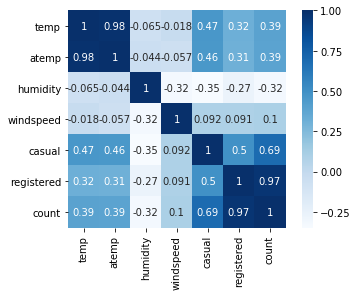

In [106]:
sns.heatmap(corr_matrix, annot=True,square=True, cmap="Blues")

# Finding Skewness

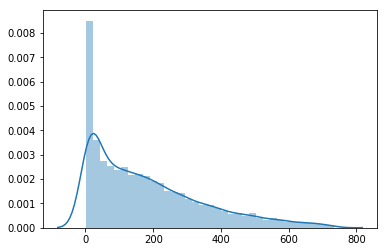

In [107]:
sns.distplot(tuple(cleaned_data["count"]))

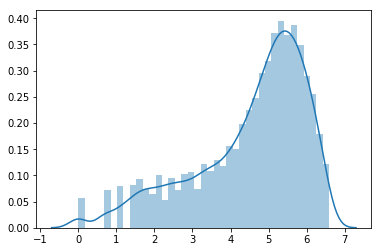

In [108]:
sns.distplot(tuple(np.log(cleaned_data["count"])))

In [109]:
cleaned_data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
time          category
weekday       category
month         category
dtype: object

In [110]:
month_mean_count = pd.DataFrame(cleaned_data.groupby("month")["count"].mean()).sort_values("count").reset_index()

In [111]:
month_mean_count

,month,count
0,January,90.366516
1,February,110.003330
2,March,145.399108
3,December,174.349451
4,April,177.013363
5,November,193.677278
6,October,205.184510
7,May,212.294118
8,September,213.777273
9,August,218.130631


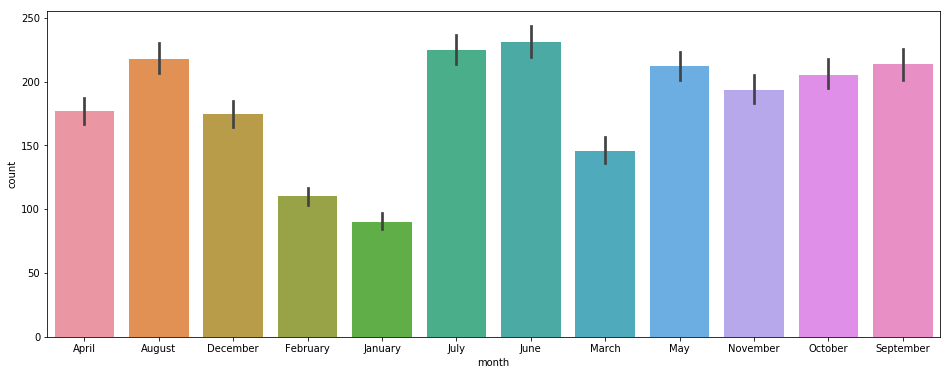

In [112]:
plt.figure(figsize=(16, 6))
sns.barplot(data = cleaned_data, y = "count", x = "month")

In [113]:
hour_mean_df = pd.DataFrame(cleaned_data.groupby(["time","season"])["count"].mean()).reset_index()

In [114]:
hour_mean_df.head(5)

,time,season,count
0,00,Fall,75.675439
1,00,Spring,28.292035
2,00,Summer,58.473684
3,00,Winter,57.877193
4,01,Fall,44.831858


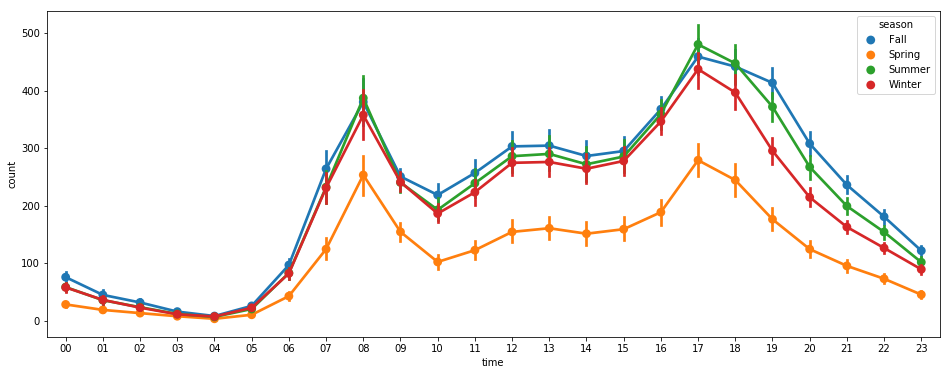

In [115]:
plt.figure(figsize=(16,6))
sns.pointplot(data = cleaned_data, y = "count", x = "time", hue = "season")

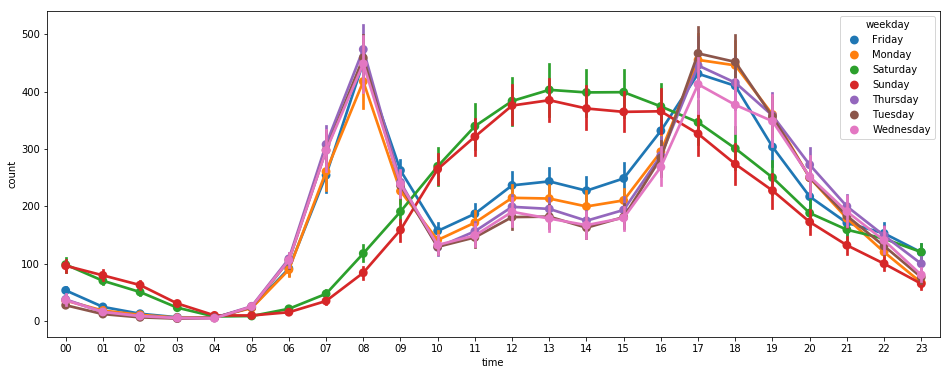

In [116]:
hour_mean_df = pd.DataFrame(cleaned_data.groupby(["time","weekday"])["count"].mean()).reset_index()
plt.figure(figsize=(16,6))
sns.pointplot(data = cleaned_data, y = "count", x = "time", hue = "weekday")

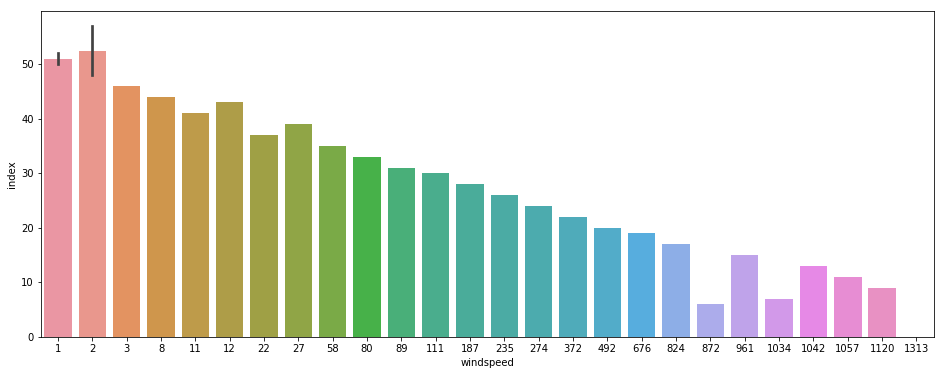

In [117]:
plt.figure(figsize=(16,6))
sns.barplot(data = data.windspeed.value_counts().reset_index(), y = "index", x = "windspeed")

In [118]:
data_test = pd.read_csv("test.csv")

In [119]:
data_train = pd.read_csv("train.csv")

In [120]:
data_test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [121]:
data_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [122]:
data = data_train.append(data_test, sort=False)
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [123]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])

In [124]:
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")

In [125]:
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])

In [126]:
data["weekday"] = data.date.apply(lambda x : datetime.strptime(x, "%Y-%m-%d").weekday())

In [127]:
data["month"] = data.date.apply(lambda x : datetime.strptime(x, "%Y-%m-%d").month)

In [128]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count         float64
date           object
hour            int64
year           object
weekday         int64
month           int64
dtype: object

In [129]:
category_type_features = ["season", "holiday", "weather", "month", "year", "hour", "workingday"]
for i in category_type_features :
    data[i] = data[i].astype("category")

In [130]:
data.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual         float64
registered     float64
count          float64
date            object
hour          category
year          category
weekday          int64
month         category
dtype: object

In [131]:
data_train = data[pd.notnull(data["count"])].sort_values(by = "datetime")
data_test = data[pd.isnull(data["count"])].sort_values(by = "datetime")
datetime_col = data_test["datetime"]
y_labels = data_train["count"]
y_labels_registered = data_train["registered"]
y_labels_casual = data_train["casual"]

In [132]:
drop_features = ["datetime", "registered", "casual", "date", "count"]
data_train.drop(drop_features, inplace=True, axis=1)
data_test.drop(drop_features, inplace=True, axis=1)

In [133]:
data_test.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3,1
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3,1
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3,1


In [134]:
data_train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,0,2011,5,1
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,5,1
2,1,0,0,1,9.02,13.635,80,0.0,2,2011,5,1
3,1,0,0,1,9.84,14.395,75,0.0,3,2011,5,1
4,1,0,0,1,9.84,14.395,75,0.0,4,2011,5,1


In [135]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
y_labels_log = np.log1p(y_labels)
lr_model.fit(X = data_train, y = y_labels_log)
train_y_pred = lr_model.predict(X = data_train)

In [136]:
from sklearn.metrics import mean_squared_log_error

In [137]:
print ("RMSLE Value For Linear Regression: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_labels_log),np.expm1(train_y_pred))))

('RMSLE Value For Linear Regression: ', 1.0158500002746578)


In [138]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200)
rf_model.fit(X = data_train, y = y_labels_log)
train_y_pred = rf_model.predict(X = data_train)

In [139]:
print ("RMSLE Value For Random Forest Regressor: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_labels_log),np.expm1(train_y_pred))))

('RMSLE Value For Random Forest Regressor: ', 0.10962624301605409)


In [140]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01)
gbm.fit(X = data_train, y = y_labels_log)
train_y_pred = gbm.predict(X = data_train)

In [141]:
print ("RMSLE Value For Gradient Boost: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_labels_log),np.expm1(train_y_pred))))

('RMSLE Value For Gradient Boost: ', 0.20820457537732667)


# Testing on test_train_split

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data_train, y_labels_log, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(8708, 12) (8708,)
(2178, 12) (2178,)


In [144]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200)
rf_model.fit(X = X_train, y = y_train)
test_y_pred = rf_model.predict(X = X_test)
print ("RMSLE Value For Random Forest Regressor: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))

('RMSLE Value For Random Forest Regressor: ', 0.30155610366338453)


In [145]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(X = X_train, y = y_train)
train_y_pred = gbm.predict(X = X_test)
print ("RMSLE Value For Gradient Boost: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(train_y_pred))))

('RMSLE Value For Gradient Boost: ', 0.36840765837060246)


# Hyper parameter Tuning

In [146]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for x in learning_rates :
    model = GradientBoostingRegressor(learning_rate = x)
    model.fit(X = X_train, y = y_train)
    test_y_pred = model.predict(X = X_test)
    print ("RMSLE Value For Gradient Boost with learning rate : ",x
           ,np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))
    

('RMSLE Value For Gradient Boost with learning rate : ', 1, 0.3112142383977544)
('RMSLE Value For Gradient Boost with learning rate : ', 0.5, 0.30423431244527727)
('RMSLE Value For Gradient Boost with learning rate : ', 0.25, 0.3038535635859908)
('RMSLE Value For Gradient Boost with learning rate : ', 0.1, 0.3684076583706026)
('RMSLE Value For Gradient Boost with learning rate : ', 0.05, 0.48737551940258295)
('RMSLE Value For Gradient Boost with learning rate : ', 0.01, 0.8115518353380076)


In [147]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 1000, 2500, 5000]
for x in n_estimators :
    model = GradientBoostingRegressor(n_estimators = x)
    model.fit(X = X_train, y = y_train)
    test_y_pred = model.predict(X = X_test)
    print ("RMSLE Value For Gradient Boost with n_estimators : ",x
           ,np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))


('RMSLE Value For Gradient Boost with n_estimators : ', 1, 1.299703884697572)
('RMSLE Value For Gradient Boost with n_estimators : ', 2, 1.2103875897817828)
('RMSLE Value For Gradient Boost with n_estimators : ', 4, 1.0689013273800045)
('RMSLE Value For Gradient Boost with n_estimators : ', 8, 0.8688578772413376)
('RMSLE Value For Gradient Boost with n_estimators : ', 16, 0.6664533758661862)
('RMSLE Value For Gradient Boost with n_estimators : ', 32, 0.5373872996493976)
('RMSLE Value For Gradient Boost with n_estimators : ', 64, 0.44015823762102196)
('RMSLE Value For Gradient Boost with n_estimators : ', 100, 0.36840765837060246)
('RMSLE Value For Gradient Boost with n_estimators : ', 200, 0.3102026520712098)
('RMSLE Value For Gradient Boost with n_estimators : ', 1000, 0.28714560346296564)
('RMSLE Value For Gradient Boost with n_estimators : ', 2500, 0.2853222463573236)
('RMSLE Value For Gradient Boost with n_estimators : ', 5000, 0.2872658125508969)


In [148]:
max_depths = np.linspace(1, 12, 12, endpoint=True)
for x in max_depths :
    model = GradientBoostingRegressor(max_depth = x)
    model.fit(X = X_train, y = y_train)
    test_y_pred = model.predict(X = X_test)
    print ("RMSLE Value For Gradient Boost with max_depth : ",x
           ,np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))

('RMSLE Value For Gradient Boost with max_depth : ', 1.0, 0.6759670523456504)
('RMSLE Value For Gradient Boost with max_depth : ', 2.0, 0.5217731037938627)
('RMSLE Value For Gradient Boost with max_depth : ', 3.0, 0.3684076583706026)
('RMSLE Value For Gradient Boost with max_depth : ', 4.0, 0.31897806985379235)
('RMSLE Value For Gradient Boost with max_depth : ', 5.0, 0.2957363418156752)
('RMSLE Value For Gradient Boost with max_depth : ', 6.0, 0.2840414428902149)
('RMSLE Value For Gradient Boost with max_depth : ', 7.0, 0.2841166324071072)
('RMSLE Value For Gradient Boost with max_depth : ', 8.0, 0.28806389821794093)
('RMSLE Value For Gradient Boost with max_depth : ', 9.0, 0.30123417715141704)
('RMSLE Value For Gradient Boost with max_depth : ', 10.0, 0.30467742097011447)
('RMSLE Value For Gradient Boost with max_depth : ', 11.0, 0.31188027585139)
('RMSLE Value For Gradient Boost with max_depth : ', 12.0, 0.31962318088539543)


In [149]:
min_samples_splits = np.linspace(0.01, 1.0, 100, endpoint=True)
for x in min_samples_splits :
    model = GradientBoostingRegressor(min_samples_split = x)
    model.fit(X = X_train, y = y_train)
    test_y_pred = model.predict(X = X_test)
    print ("RMSLE Value For Gradient Boost with min_samples_splits : ",x
           ,np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))


('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.01, 0.38101922457701104)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.02, 0.37560334876301527)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.03, 0.38140336443990747)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.04, 0.37795789500388527)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.05, 0.39436298863133074)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.060000000000000005, 0.40401647372423594)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.06999999999999999, 0.39853477015107497)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.08, 0.41580664098369874)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.09, 0.40797191979162745)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.09999999999999999, 0.4143893504601846)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.1

('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.92, 0.6560939711617658)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.93, 0.6625888280522757)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.9400000000000001, 0.6648866734106177)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.9500000000000001, 0.6648866734106178)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.9600000000000001, 0.6759670523456501)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.97, 0.6759670523456505)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.98, 0.6759670523456502)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 0.99, 0.6759670523456502)
('RMSLE Value For Gradient Boost with min_samples_splits : ', 1.0, 0.6759670523456504)


In [150]:
max_features = list(range(1,X_train.shape[1]))
for x in max_features:
    model = GradientBoostingRegressor(max_features = x)
    model.fit(X = X_train, y = y_train)
    test_y_pred = model.predict(X = X_test)
    print ("RMSLE Value For Gradient Boost with max_features : ",x
           ,np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))


('RMSLE Value For Gradient Boost with max_features : ', 1, 0.6947360492370666)
('RMSLE Value For Gradient Boost with max_features : ', 2, 0.5748536477170317)
('RMSLE Value For Gradient Boost with max_features : ', 3, 0.5382213978807815)
('RMSLE Value For Gradient Boost with max_features : ', 4, 0.48209730415170243)
('RMSLE Value For Gradient Boost with max_features : ', 5, 0.4555332638868604)
('RMSLE Value For Gradient Boost with max_features : ', 6, 0.41760941510199956)
('RMSLE Value For Gradient Boost with max_features : ', 7, 0.38971195924510815)
('RMSLE Value For Gradient Boost with max_features : ', 8, 0.3792991811611413)
('RMSLE Value For Gradient Boost with max_features : ', 9, 0.3780268423541998)
('RMSLE Value For Gradient Boost with max_features : ', 10, 0.39091058911098814)
('RMSLE Value For Gradient Boost with max_features : ', 11, 0.3957097272019654)


In [151]:
alphas = np.linspace(0.01, 1.0, 100, endpoint=True)
for x in alphas:
    model = GradientBoostingRegressor(alpha = x)
    model.fit(X = X_train, y = y_train)
    test_y_pred = model.predict(X = X_test)
    print ("RMSLE Value For Gradient Boost with alpha : ",x
           ,np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))

('RMSLE Value For Gradient Boost with alpha : ', 0.01, 0.3684076583706025)
('RMSLE Value For Gradient Boost with alpha : ', 0.02, 0.3684076583706025)
('RMSLE Value For Gradient Boost with alpha : ', 0.03, 0.3684076583706026)
('RMSLE Value For Gradient Boost with alpha : ', 0.04, 0.36840765837060246)
('RMSLE Value For Gradient Boost with alpha : ', 0.05, 0.3684076583706026)
('RMSLE Value For Gradient Boost with alpha : ', 0.060000000000000005, 0.3684076583706025)
('RMSLE Value For Gradient Boost with alpha : ', 0.06999999999999999, 0.3684076583706025)
('RMSLE Value For Gradient Boost with alpha : ', 0.08, 0.36840765837060246)
('RMSLE Value For Gradient Boost with alpha : ', 0.09, 0.3684076583706025)
('RMSLE Value For Gradient Boost with alpha : ', 0.09999999999999999, 0.36840765837060246)
('RMSLE Value For Gradient Boost with alpha : ', 0.11, 0.3684076583706026)
('RMSLE Value For Gradient Boost with alpha : ', 0.12, 0.3684076583706024)
('RMSLE Value For Gradient Boost with alpha : ', 0.

ValueError: alpha must be in (0.0, 1.0) but was 1.0

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
#gbm = GradientBoostingRegressor(max_features = 11, min_samples_split = 0.05, max_depth = 8, n_estimators = 5000, learning_rate = 0.5)
gbm.fit(X = X_train, y = y_train)
test_y_pred = gbm.predict(X = X_test)b
print ("RMSLE Value For Gradient Boost: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_test),max(0,np.expm1(test_y_pred)))))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 5000)
#max_features = 11, min_samples_split = 0.05, max_depth = 8, n_estimators = 5000, learning_rate = 0.5
gbm.fit(X = X_train, y = y_train)
train_y_pred = gbm.predict(X = X_test)
print ("RMSLE Value For Gradient Boost: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(train_y_pred))))

In [ ]:
def rmsle(y, y_):
    return np.sqrt(mean_squared_log_error(np.expm1(y),np.expm1(y_)))

In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import metrics

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

n_estimators_list = [1, 2, 4, 8, 16, 32, 64, 100, 200, 1000, 2500, 5000]
param_test1 = {'n_estimators' : n_estimators_list}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_test1, scoring=rmsle_scorer,cv = 5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_


# learning rate : 0.1 output was --> ({'n_estimators': 1000}, -0.2856293263149054)


In [ ]:
X_train.shape

In [ ]:
split_samples_list = [50, 100, 500, 1000, 2000, 5000]
max_depth_list = range(5,16,3)
param_test2= {'max_depth' : max_depth_list, 'min_samples_split' : split_samples_list}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=1000), param_grid = param_test2, scoring=rmsle_scorer,cv = 5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

# ({'max_depth': 5, 'min_samples_split': 50}, -0.2863629564660638)


In [ ]:
X_train.shape

In [ ]:
max_features_list = range(1,X_train.shape[1] + 1, 1)
param_test3= {'max_features' : max_features_list}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=1000, max_depth=5, min_samples_split=50), param_grid = param_test3, scoring=rmsle_scorer,cv = 5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch2.best_score_
#({'max_features': 9}, -0.2863629564660638)

 # Optimized Run

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=1000, max_depth=5, min_samples_split=50, max_features = 9)
#gbm = GradientBoostingRegressor(max_features = 11, min_samples_split = 0.05, max_depth = 8, n_estimators = 5000, learning_rate = 0.5)
gbm.fit(X = X_train, y = y_train)
test_y_pred = gbm.predict(X = X_test)
print ("RMSLE Value For Gradient Boost Optimized: ",
       np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(test_y_pred))))

# Final Kaggle Submission

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=1000, max_depth=5, min_samples_split=50, max_features = 9)
gbm.fit(X = data_train, y = y_labels_log)
train_y_pred = gbm.predict(X = data_test)

In [ ]:
submission = pd.DataFrame({
        "datetime": datetime_col,
        "count": [max(0, x) for x in np.expm1(train_y_pred)]
    })
submission.to_csv('bike_predictions_gbm_optimized.csv', index=False)